In [1]:
from __future__ import print_function
import numpy as np
import tensorflow as tf
from six.moves import cPickle as pickle
from six.moves import range
import time

from common import *

import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
import logging

In [3]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

In [4]:
with open('SVHN_train.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    train_dataset_56 = tmp_save['dataset']
    train_labels = tmp_save['labels']
    
valid_size = 2000
valid_dataset_56 = train_dataset_56[:valid_size]
valid_labels = train_labels[:valid_size]
train_dataset_56 = train_dataset_56[valid_size:]
train_labels = train_labels[valid_size:]

with open('SVHN_test.pickle', 'rb') as f:
    tmp_save = pickle.load(f)
    test_dataset_56 = tmp_save['dataset'][::2]
    test_labels = tmp_save['labels'][::2]
    
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)   

Training set (31402, 56, 56) (31402,)
Validation set (2000, 56, 56) (2000,)
Test set (6534, 56, 56) (6534,)


In [5]:
num_digits = 3

train_dataset_56, train_labels = max_digits(train_dataset_56, train_labels, num_digits)
valid_dataset_56, valid_labels = max_digits(valid_dataset_56, valid_labels, num_digits)
test_dataset_56, test_labels = max_digits(test_dataset_56, test_labels, num_digits)
print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape) 

Training set (30041, 56, 56) (30041,)
Validation set (1917, 56, 56) (1917,)
Test set (6471, 56, 56) (6471,)


Labels [3]
Dtype float32
Shape (56, 56)
Color range -0.48885 0.5


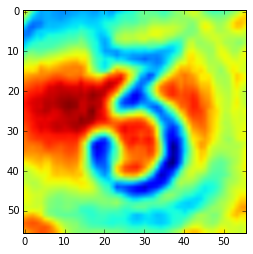

Labels [2 6]
Dtype float32
Shape (56, 56)
Color range -0.501541 0.5


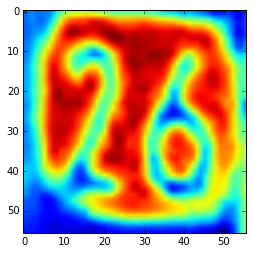

Labels [1 1 4]
Dtype float32
Shape (56, 56)
Color range -0.511337 0.5


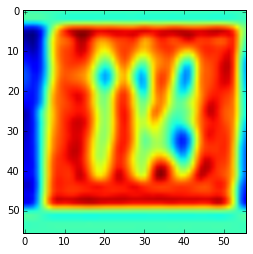

Labels [2 8]
Dtype float32
Shape (56, 56)
Color range -0.503958 0.5


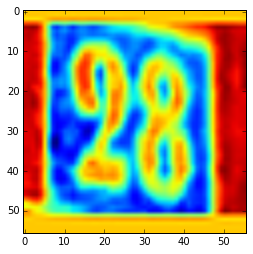

Labels [2 5]
Dtype float32
Shape (56, 56)
Color range -0.500598 0.5


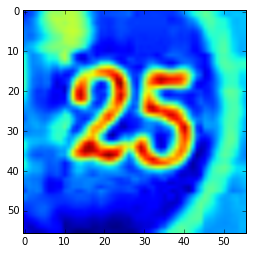

Labels [4 8]
Dtype float32
Shape (56, 56)
Color range -0.510333 0.5


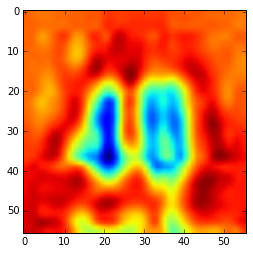

In [6]:
for dataset, labels in [(train_dataset_56, train_labels),
                        (valid_dataset_56, valid_labels),
                        (test_dataset_56, test_labels)]:
    show_images(dataset, labels, 2)

In [7]:
num_labels = 11 # Add an extra character so we can deal with spaces
num_channels = 1 # grayscale

train_dataset_56, train_labels = reformat(num_digits, num_labels, train_dataset_56, train_labels)
valid_dataset_56, valid_labels = reformat(num_digits, num_labels, valid_dataset_56, valid_labels)
test_dataset_56, test_labels = reformat(num_digits, num_labels, test_dataset_56, test_labels)

print('Training set', train_dataset_56.shape, train_labels.shape)
print('Validation set', valid_dataset_56.shape, valid_labels.shape)
print('Test set', test_dataset_56.shape, test_labels.shape)

Training set (30041, 56, 56, 1) (30041, 3, 11)
Validation set (1917, 56, 56, 1) (1917, 3, 11)
Test set (6471, 56, 56, 1) (6471, 3, 11)


In [8]:
test_dataset_56 = test_dataset_56[:6000]
test_labels = test_labels[:6000]

train_dataset_28 = train_dataset_56[:, ::2, ::2, :]
valid_dataset_28 = valid_dataset_56[:, ::2, ::2, :]
test_dataset_28 = test_dataset_56[:, ::2, ::2, :]
print('Training set', train_dataset_28.shape, train_labels.shape)
print('Validation set', valid_dataset_28.shape, valid_labels.shape)
print('Test set', test_dataset_28.shape, test_labels.shape)

Training set (30041, 28, 28, 1) (30041, 3, 11)
Validation set (1917, 28, 28, 1) (1917, 3, 11)
Test set (6000, 28, 28, 1) (6000, 3, 11)


In [9]:
dataset_56 = (train_dataset_56, valid_dataset_56, test_dataset_56)
dataset_28 = (train_dataset_28, valid_dataset_28, test_dataset_28)

In [17]:
train_dataset, valid_dataset, test_dataset = dataset_28

def run(graph_config):
    graph_config.update({'depth1':4, 'depth2':4})
    print(graph_config)
    batch_size=16
    graph = create_graph(batch_size, num_digits, num_labels, valid_dataset, test_dataset, **graph_config) 
    run_graph(graph, batch_size, num_digits, train_dataset, train_labels, valid_labels, test_labels)
    return graph

In [18]:
graph = run({})

{'depth2': 4, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):14/60 (0.24%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.906268
Minibatch accuracy: 31.2%
Validation accuracy: 40.6%
Elapsed time(s):33/60 (0.56%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.814088
Minibatch accuracy: 35.4%
Validation accuracy: 48.0%
Elapsed time(s):52/60 (0.88%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.292620
Minibatch accuracy: 62.5%
Validation accuracy: 52.6%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.049588
Minibatch loss at step 1598: 1.583106
Minibatch accuracy: 60.4%
Validation accuracy: 53.3%
Test accuracy: 56.4%
Finished


In [19]:
graph = run({'use_dropout':True})

{'depth2': 4, 'use_dropout': True, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):14/60 (0.25%)
Learning rate: 0.0498705
Minibatch loss at step 500: 1.866406
Minibatch accuracy: 33.3%
Validation accuracy: 42.1%
Elapsed time(s):34/60 (0.57%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 1.807637
Minibatch accuracy: 39.6%
Validation accuracy: 46.0%
Elapsed time(s):53/60 (0.88%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.367099
Minibatch accuracy: 52.1%
Validation accuracy: 51.6%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.0495895
Minibatch loss at step 1592: 1.611070
Minibatch accuracy: 62.5%
Validation accuracy: 51.1%
Test accuracy: 54.7%
Finished


In [20]:
graph = run({'use_dropout':True,
             'learning_rate':0.5})

{'depth2': 4, 'use_dropout': True, 'learning_rate': 0.5, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):15/60 (0.27%)
Learning rate: 0.498705
Minibatch loss at step 500: 2.022565
Minibatch accuracy: 27.1%
Validation accuracy: 39.0%
Elapsed time(s):38/60 (0.64%)
Learning rate: 0.497417
Minibatch loss at step 1000: 2.077204
Minibatch accuracy: 31.2%
Validation accuracy: 39.0%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.496216
Minibatch loss at step 1467: 1.879202
Minibatch accuracy: 41.7%
Validation accuracy: 39.0%
Test accuracy: 43.7%
Finished


In [21]:
graph = run({'use_dropout':True,
             'learning_decay':0.2})

{'depth2': 4, 'use_dropout': True, 'learning_decay': 0.2, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):15/60 (0.26%)
Learning rate: 0.0495985
Minibatch loss at step 500: 1.955740
Minibatch accuracy: 29.2%
Validation accuracy: 40.1%
Elapsed time(s):34/60 (0.58%)
Learning rate: 0.0492009
Minibatch loss at step 1000: 1.890378
Minibatch accuracy: 33.3%
Validation accuracy: 42.1%
Elapsed time(s):53/60 (0.89%)
Learning rate: 0.0488066
Minibatch loss at step 1500: 1.419272
Minibatch accuracy: 62.5%
Validation accuracy: 48.3%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.0487516
Minibatch loss at step 1570: 1.688395
Minibatch accuracy: 50.0%
Validation accuracy: 48.5%
Test accuracy: 53.8%
Finished


In [22]:
graph = run({'use_dropout':True,
             'learning_rate':0.5,
             'learning_decay':0.2})

{'depth2': 4, 'use_dropout': True, 'learning_decay': 0.2, 'learning_rate': 0.5, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):17/60 (0.29%)
Learning rate: 0.495985
Minibatch loss at step 500: 2.022212
Minibatch accuracy: 27.1%
Validation accuracy: 39.0%
Elapsed time(s):37/60 (0.62%)
Learning rate: 0.492009
Minibatch loss at step 1000: 2.077652
Minibatch accuracy: 31.2%
Validation accuracy: 39.0%
Elapsed time(s):55/60 (0.93%)
Learning rate: 0.488066
Minibatch loss at step 1500: 1.740503
Minibatch accuracy: 41.7%
Validation accuracy: 39.0%
Elapsed time(s):60/60 (1.01%)

TIMEUP!
Learning rate: 0.488058
Minibatch loss at step 1501: 1.817166
Minibatch accuracy: 35.4%
Validation accuracy: 39.0%
Test accuracy: 43.7%
Finished


In [23]:
graph = run({'use_dropout':True,
             'learning_rate':.4})

{'depth2': 4, 'use_dropout': True, 'learning_rate': 0.4, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):15/60 (0.25%)
Learning rate: 0.398964
Minibatch loss at step 500: 2.023935
Minibatch accuracy: 27.1%
Validation accuracy: 39.0%
Elapsed time(s):34/60 (0.57%)
Learning rate: 0.397933
Minibatch loss at step 1000: 2.077759
Minibatch accuracy: 31.2%
Validation accuracy: 39.0%
Elapsed time(s):53/60 (0.89%)
Learning rate: 0.396905
Minibatch loss at step 1500: 1.740400
Minibatch accuracy: 41.7%
Validation accuracy: 39.0%
Elapsed time(s):60/60 (1.00%)

TIMEUP!
Learning rate: 0.396743
Minibatch loss at step 1579: 1.805403
Minibatch accuracy: 37.5%
Validation accuracy: 39.0%
Test accuracy: 43.7%
Finished


In [25]:
graph = run({'use_dropout':True,
             'use_max_pool':True})

{'depth2': 4, 'use_dropout': True, 'use_max_pool': True, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):7/60 (0.13%)
Learning rate: 0.0498705
Minibatch loss at step 500: 2.036088
Minibatch accuracy: 27.1%
Validation accuracy: 39.0%
Elapsed time(s):17/60 (0.29%)
Learning rate: 0.0497417
Minibatch loss at step 1000: 2.080505
Minibatch accuracy: 33.3%
Validation accuracy: 39.4%
Elapsed time(s):26/60 (0.45%)
Learning rate: 0.0496131
Minibatch loss at step 1500: 1.647638
Minibatch accuracy: 43.8%
Validation accuracy: 42.1%
Elapsed time(s):36/60 (0.61%)
Learning rate: 0.0494849
Minibatch loss at step 2000: 1.577375
Minibatch accuracy: 50.0%
Validation accuracy: 45.2%
Elapsed time(s):46/60 (0.78%)
Learning rate: 0.049357
Minibatch loss at step 2500: 1.361084
Minibatch accuracy: 62.5%
Validation accuracy: 49.6%
Elapsed time(s):57/60 (0.96%)
Learning rate: 0.0492295
Minibatch loss at step 3000: 1.216743
Minibatch accuracy: 66.7%
Validation accuracy: 54.2%
Elapsed time(s):61/60 (1

In [26]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.5})

{'depth2': 4, 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.5, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):8/60 (0.14%)
Learning rate: 0.498705
Minibatch loss at step 500: 1.681416
Minibatch accuracy: 50.0%
Validation accuracy: 46.4%
Elapsed time(s):17/60 (0.29%)
Learning rate: 0.497417
Minibatch loss at step 1000: 1.745607
Minibatch accuracy: 62.5%
Validation accuracy: 54.1%
Elapsed time(s):27/60 (0.45%)
Learning rate: 0.496131
Minibatch loss at step 1500: 1.011994
Minibatch accuracy: 85.4%
Validation accuracy: 58.2%
Elapsed time(s):37/60 (0.63%)
Learning rate: 0.494849
Minibatch loss at step 2000: 1.598587
Minibatch accuracy: 54.2%
Validation accuracy: 57.0%
Elapsed time(s):47/60 (0.78%)
Learning rate: 0.49357
Minibatch loss at step 2500: 1.064005
Minibatch accuracy: 75.0%
Validation accuracy: 58.8%
Elapsed time(s):56/60 (0.94%)
Learning rate: 0.492295
Minibatch loss at step 3000: 1.234086
Minibatch accuracy: 79.2%
Validation accuracy: 60.2%
Elapsed 

In [27]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.75})

{'depth2': 4, 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.75, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):7/60 (0.12%)
Learning rate: 0.748058
Minibatch loss at step 500: 1.989770
Minibatch accuracy: 35.4%
Validation accuracy: 44.3%
Elapsed time(s):16/60 (0.28%)
Learning rate: 0.746125
Minibatch loss at step 1000: 1.728227
Minibatch accuracy: 47.9%
Validation accuracy: 49.8%
Elapsed time(s):26/60 (0.43%)
Learning rate: 0.744197
Minibatch loss at step 1500: 1.302238
Minibatch accuracy: 77.1%
Validation accuracy: 53.6%
Elapsed time(s):35/60 (0.59%)
Learning rate: 0.742274
Minibatch loss at step 2000: 1.476143
Minibatch accuracy: 52.1%
Validation accuracy: 54.8%
Elapsed time(s):44/60 (0.75%)
Learning rate: 0.740355
Minibatch loss at step 2500: 1.034026
Minibatch accuracy: 75.0%
Validation accuracy: 55.4%
Elapsed time(s):54/60 (0.91%)
Learning rate: 0.738442
Minibatch loss at step 3000: 1.463179
Minibatch accuracy: 72.9%
Validation accuracy: 54.4%
Elapse

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25})

{'depth2': 4, 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.25, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):8/60 (0.13%)
Learning rate: 0.249353
Minibatch loss at step 500: 1.782479
Minibatch accuracy: 54.2%
Validation accuracy: 43.6%
Elapsed time(s):17/60 (0.29%)
Learning rate: 0.248708
Minibatch loss at step 1000: 1.860458
Minibatch accuracy: 52.1%
Validation accuracy: 53.4%
Elapsed time(s):27/60 (0.45%)
Learning rate: 0.248066
Minibatch loss at step 1500: 1.138054
Minibatch accuracy: 81.2%
Validation accuracy: 60.3%
Elapsed time(s):36/60 (0.61%)
Learning rate: 0.247424
Minibatch loss at step 2000: 1.170651
Minibatch accuracy: 70.8%
Validation accuracy: 62.3%
Elapsed time(s):46/60 (0.77%)
Learning rate: 0.246785
Minibatch loss at step 2500: 0.844771
Minibatch accuracy: 85.4%
Validation accuracy: 67.2%
Elapsed time(s):59/60 (0.99%)
Learning rate: 0.246147
Minibatch loss at step 3000: 0.798026
Minibatch accuracy: 87.5%
Validation accuracy: 67.9%
Elapse

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.125})

{'depth2': 4, 'use_dropout': True, 'use_max_pool': True, 'learning_rate': 0.125, 'depth1': 4}
Batch_size:16
Mins:1
Initialized
Elapsed time(s):9/60 (0.16%)
Learning rate: 0.124676
Minibatch loss at step 500: 1.896754
Minibatch accuracy: 33.3%
Validation accuracy: 40.1%

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':128})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':32})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':256})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':32})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':8})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':12})

In [ ]:
graph = run({'use_dropout':True,
             'use_max_pool':True,
             'learning_rate':0.25,
             'num_hidden':192,
             'depth1':24})